# data

In [1]:
# pip install scikit-learn-extra

In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import scipy.cluster.hierarchy as sch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

In [2]:
metadata=pd.read_csv("covid.csv")
metadata.head(10)

test_date cough fever  sore_throat  shortness_of_breath  head_ache  \
0  3/31/2020    0     0             0                    0          0   
1  3/31/2020    0     0             0                    0          0   
2  3/31/2020    0     0             0                    0          0   
3  3/31/2020    0     0             0                    0          0   
4  3/31/2020    1     0             0                    0          0   
5  3/31/2020    1     1             0                    1          0   
6  3/31/2020    0     0             0                    0          0   
7  3/31/2020    0     0             0                    0          0   
8  3/31/2020    0     0             0                    0          0   
9  3/31/2020    0     0             0                    0          0   

  corona_result age_60_and_above  gender test_indication  
0      negative               No    male           Other  
1      negative               No  female           Other  
2      negative               No    male           Other  
3      positive               No  female           Other  
4      negative               No    male          Abroad  
5      positive               No    male           Other  
6      negative               No    male           Other  
7      negative               No    male           Other  
8      negative               No    male           Other  
9      negative               No    male           Other

In [3]:
metadata.shape

(53843, 10)

In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53843 non-null  object
 2   fever                53843 non-null  object
 3   sore_throat          53843 non-null  int64 
 4   shortness_of_breath  53843 non-null  int64 
 5   head_ache            53843 non-null  int64 
 6   corona_result        53843 non-null  object
 7   age_60_and_above     53843 non-null  object
 8   gender               53843 non-null  object
 9   test_indication      53843 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.1+ MB


In [5]:
metadata.drop('test_date', axis=1, inplace=True)

In [6]:
metadata.apply(pd.Series.value_counts)

cough    fever  sore_throat  shortness_of_breath  \
0                           NaN      NaN      53021.0              53189.0   
1                           NaN      NaN        822.0                654.0   
0                       45773.0  49032.0          NaN                  NaN   
1                        8054.0   4794.0          NaN                  NaN   
Abroad                      NaN      NaN          NaN                  NaN   
Contact with confirmed      NaN      NaN          NaN                  NaN   
No                          NaN      NaN          NaN                  NaN   
None                       16.0     17.0          NaN                  NaN   
Other                       NaN      NaN          NaN                  NaN   
Yes                         NaN      NaN          NaN                  NaN   
female                      NaN      NaN          NaN                  NaN   
male                        NaN      NaN          NaN                  NaN   
negative                    NaN      NaN          NaN                  NaN   
other                       NaN      NaN          NaN                  NaN   
positive                    NaN      NaN          NaN                  NaN   

                        head_ache  corona_result  age_60_and_above   gender  \
0                         52648.0            NaN               NaN      NaN   
1                          1195.0            NaN               NaN      NaN   
0                             NaN            NaN               NaN      NaN   
1                             NaN            NaN               NaN      NaN   
Abroad                        NaN            NaN               NaN      NaN   
Contact with confirmed        NaN            NaN               NaN      NaN   
No                            NaN            NaN           45994.0      NaN   
None                          NaN            NaN               NaN   1194.0   
Other                         NaN            NaN               NaN      NaN   
Yes                           NaN            NaN            7849.0      NaN   
female                        NaN            NaN               NaN  26436.0   
male                          NaN            NaN               NaN  26213.0   
negative                      NaN        48225.0               NaN      NaN   
other                         NaN          823.0               NaN      NaN   
positive                      NaN         4795.0               NaN      NaN   

                        test_indication  
0                                   NaN  
1                                   NaN  
0                                   NaN  
1                                   NaN  
Abroad                           5041.0  
Contact with confirmed           3100.0  
No                                  NaN  
None                                NaN  
Other                           45702.0  
Yes                                 NaN  
female                              NaN  
male                                NaN  
negative                            NaN  
other                               NaN  
positive                            NaN

In [7]:
test=metadata.copy()
test['cough']=test['cough'].replace(['1','0','None'],[1, 0, np.nan])
test['fever']=test['fever'].replace(['1', '0','None'],[1, 0, np.nan])
test['sore_throat']=test['sore_throat'].replace(['1','0','None'],[1,0,np.nan])
test['shortness_of_breath']=test['shortness_of_breath'].replace(['1','0','None'],[1,0,np.nan])
test['head_ache']=test['head_ache'].replace(['1','0','None'],[1,0,np.nan])
test['gender']=test['gender'].replace(['female', 'male', 'None'], [0, 1, np.nan])
test['age_60_and_above']=test['age_60_and_above'].replace(['None', 'No', 'Yes'], [np.nan, 0 ,1])
test['test_indication']=test['test_indication'].replace(['Contact with confirmed', 'Other', 'Abroad'], [1, 0, 0])
test['corona_result']=test['corona_result'].replace(['negative', 'positive'], [0, 1])

test

cough fever  sore_throat  shortness_of_breath  head_ache corona_result  \
0        0     0             0                    0          0             0   
1        0     0             0                    0          0             0   
2        0     0             0                    0          0             0   
3        0     0             0                    0          0             1   
4        1     0             0                    0          0             0   
...     ...   ...          ...                  ...        ...           ...   
53838    1     1             0                    0          0             0   
53839    1     1             1                    0          1             0   
53840    1     0             0                    0          0             0   
53841    1     0             0                    0          0             0   
53842    1     0             0                    0          0             0   

       age_60_and_above  gender  test_indication  
0                     0     1.0                0  
1                     0     0.0                0  
2                     0     1.0                0  
3                     0     0.0                0  
4                     0     1.0                0  
...                 ...     ...              ...  
53838                 1     0.0                0  
53839                 0     0.0                0  
53840                 0     0.0                0  
53841                 0     1.0                0  
53842                 0     1.0                0  

[53843 rows x 9 columns]

In [8]:
test.apply(pd.Series.value_counts)

cough    fever  sore_throat  shortness_of_breath  head_ache  \
0          NaN      NaN      53021.0              53189.0    52648.0   
1          NaN      NaN        822.0                654.0     1195.0   
0      45773.0  49032.0          NaN                  NaN        NaN   
1       8054.0   4794.0          NaN                  NaN        NaN   
other      NaN      NaN          NaN                  NaN        NaN   

       corona_result  age_60_and_above   gender  test_indication  
0            48225.0           45994.0  26436.0          50743.0  
1             4795.0            7849.0  26213.0           3100.0  
0                NaN               NaN      NaN              NaN  
1                NaN               NaN      NaN              NaN  
other          823.0               NaN      NaN              NaN

In [9]:
test.drop(test[test['corona_result']=='other'].index, inplace=True)
test.apply(pd.Series.value_counts)

cough    fever  sore_throat  shortness_of_breath  head_ache  \
0       NaN      NaN      52213.0              52382.0    51843.0   
1       NaN      NaN        807.0                638.0     1177.0   
0   45060.0  48292.0          NaN                  NaN        NaN   
1    7944.0   4711.0          NaN                  NaN        NaN   

    corona_result  age_60_and_above   gender  test_indication  
0         48225.0           45317.0  26037.0          49978.0  
1          4795.0            7703.0  25794.0           3042.0  
0             NaN               NaN      NaN              NaN  
1             NaN               NaN      NaN              NaN

In [10]:
np.random.seed(2022)
test.age_60_and_above.fillna(np.random.randint(0, 1), inplace =True)
test.cough.fillna(np.random.randint(0, 1), inplace =True)
test.fever.fillna(np.random.randint(0, 1), inplace =True)
test.sore_throat.fillna(np.random.randint(0, 1), inplace =True)
test.shortness_of_breath.fillna(np.random.randint(0, 1), inplace =True)
test.head_ache.fillna(np.random.randint(0, 1), inplace =True)
test.gender.fillna(np.random.randint(0, 1), inplace =True)
test.test_indication.fillna(np.random.randint(0, 1), inplace =True)

test.apply(pd.Series.value_counts)

cough    fever  sore_throat  shortness_of_breath  head_ache  \
0      16.0     17.0      52213.0              52382.0    51843.0   
1       NaN      NaN        807.0                638.0     1177.0   
0   45060.0  48292.0          NaN                  NaN        NaN   
1    7944.0   4711.0          NaN                  NaN        NaN   

    corona_result  age_60_and_above   gender  test_indication  
0         48225.0           45317.0  27226.0          49978.0  
1          4795.0            7703.0  25794.0           3042.0  
0             NaN               NaN      NaN              NaN  
1             NaN               NaN      NaN              NaN

In [11]:
test.cough=test.cough.astype('int8')
test.fever=test.fever.astype('int8')
test.gender=test.gender.astype('int8')
test.corona_result=test.corona_result.astype('int8')

In [12]:
test.apply(pd.Series.value_counts)

cough  fever  sore_throat  shortness_of_breath  head_ache  corona_result  \
0  45076  48309        52213                52382      51843          48225   
1   7944   4711          807                  638       1177           4795   

   age_60_and_above  gender  test_indication  
0             45317   27226            49978  
1              7703   25794             3042

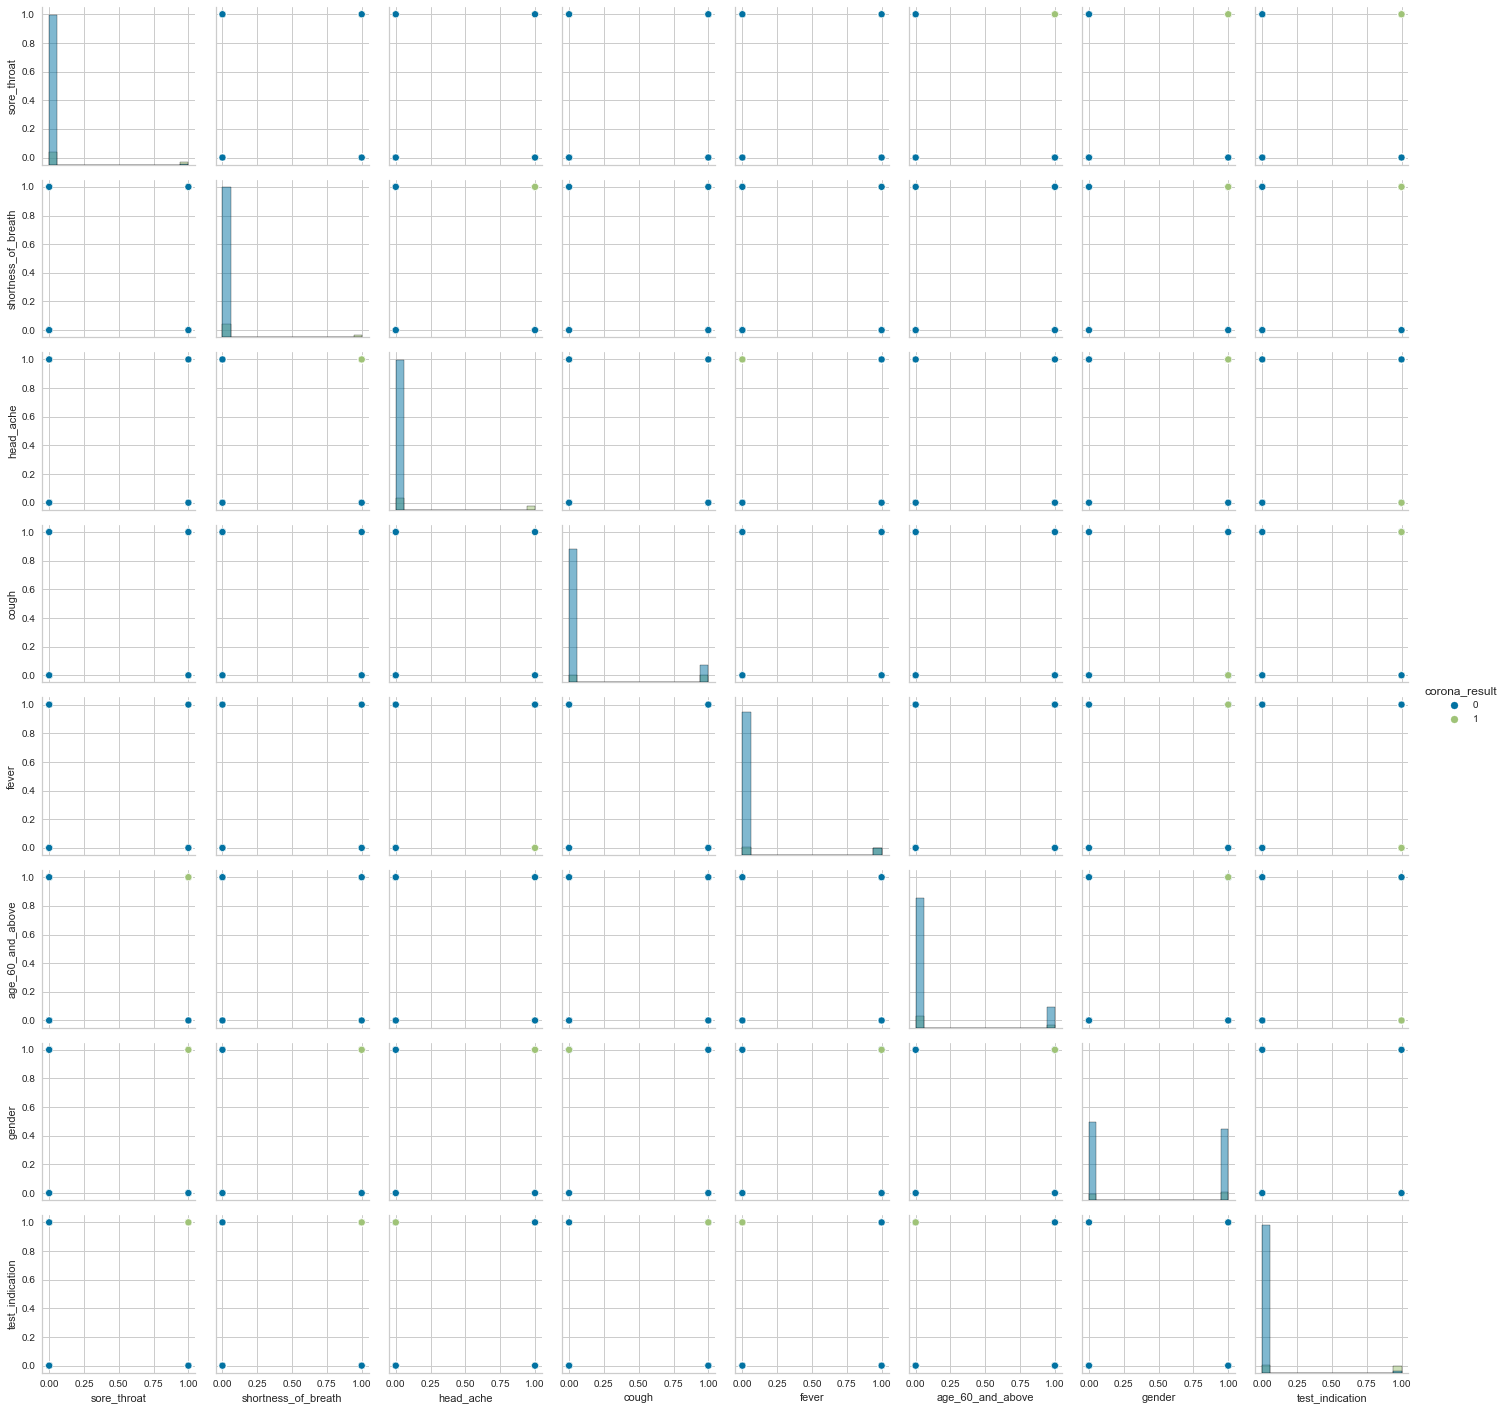

In [14]:
x_vars = ["sore_throat", "shortness_of_breath", "head_ache", "cough", "fever", "age_60_and_above", "gender", "test_indication"]
y_vars = ["corona_result"]
g = sns.PairGrid(test, hue='corona_result',x_vars=x_vars, y_vars=x_vars)
# g = sns.PairGrid(test, hue='corona_result')
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.scatterplot)
g.add_legend()

# one hot encoding

In [15]:
# data_dum = pd.get_dummies(metadata)
# pd.DataFrame(data_dum)

In [16]:
# data_dum.apply(pd.Series.value_counts)

In [17]:
# data_dum.isnull().sum()

In [18]:
# # Visualize the correlation your data and identify variables for further analysis
# # g = sns.PairGrid(metadata, hue="corona_result",corner=True)
# g = sns.PairGrid(data_dum, corner=True)
# g.map(sns.scatterplot)
# # g.map(sns.histplot)
# # g.add_legend(title="", adjust_subtitles=True)
# g.add_legend()

# correlation

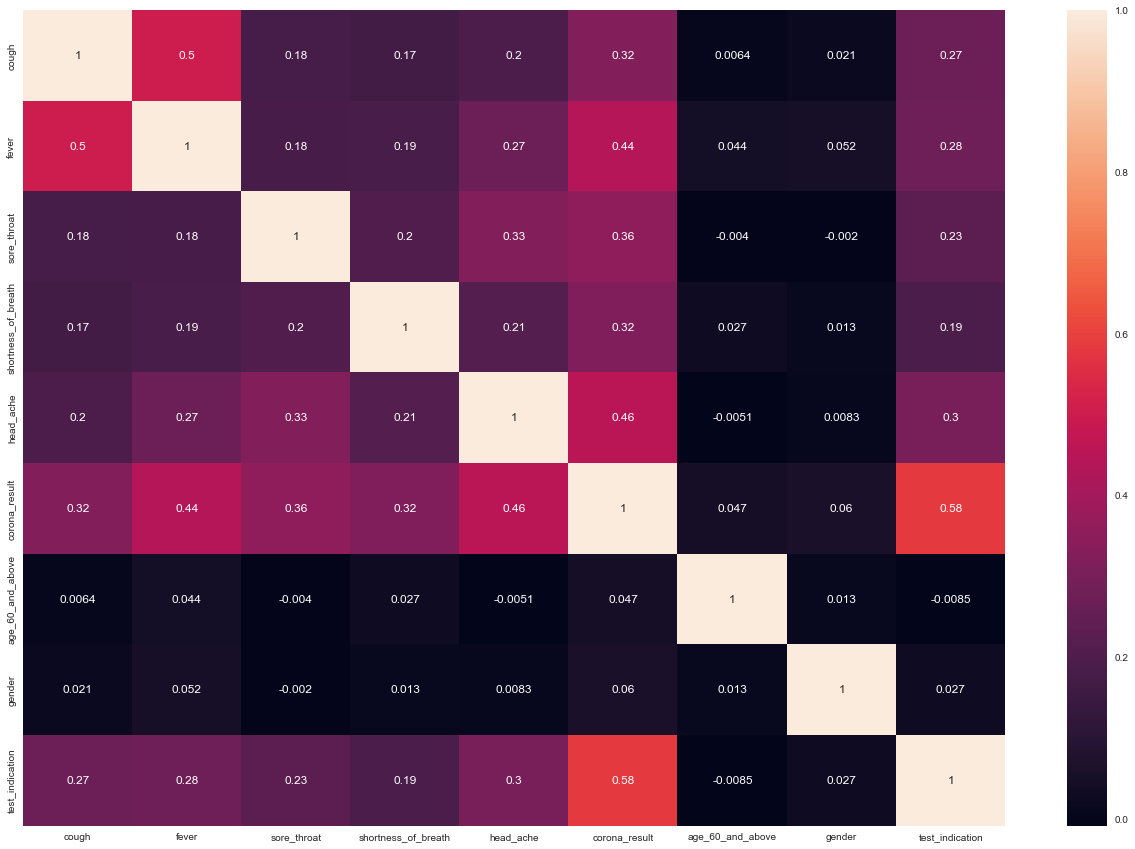

In [15]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(test.corr(), annot=True)
plt.show()

# KMeans

In [13]:
random_state=2022

In [27]:
silhouette_avg = []
inertia_list = []
for i in range(2,15):
    kmeans_fit = KMeans(n_clusters = i, init='k-means++', random_state=random_state).fit(test)
    silhouette_avg.append(silhouette_score(test, kmeans_fit.labels_))
    inertia_list.append(kmeans_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

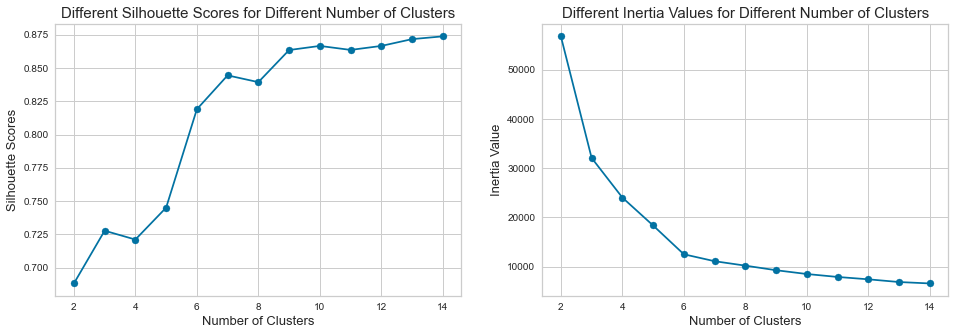

In [28]:
plt.rcParams['figure.figsize'] = [16,5]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.subplot(121)
plt.plot(range(2, 15), silhouette_avg)
plt.scatter(range(2, 15), silhouette_avg)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Silhouette Scores", size=13)
plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

plt.subplot(122)
plt.plot(range(2,15),inertia_list)
plt.scatter(range(2,15),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

In [21]:
# kmeans = KMeans()
# kviz = KElbowVisualizer(kmeans, k=(3,13), metric='silhouette', timings=False)
# kviz.fit(test)
# kviz.show()
# plt.show()

In [29]:
#Train the Model
kmeans = KMeans(n_clusters=6, init='k-means++',random_state=random_state).fit(test)
test['cluster'] = kmeans.labels_

In [30]:
test.sort_values(by='cluster')

cough  fever  sore_throat  shortness_of_breath  head_ache  \
26845      0      0            0                    0          0   
40648      0      0            0                    0          0   
19113      0      0            0                    0          0   
19112      0      0            0                    0          0   
19110      0      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
49945      1      1            0                    0          0   
49946      1      1            0                    0          0   
49948      1      1            0                    0          0   
5652       1      1            0                    0          0   
49909      1      1            0                    0          0   

       corona_result  age_60_and_above  gender  test_indication  cluster  
26845              0                 0       0                0        0  
40648              0                 0       0                0        0  
19113              0                 0       0                0        0  
19112              0                 0       0                0        0  
19110              0                 0       0                0        0  
...              ...               ...     ...              ...      ...  
49945              0                 0       0                0        5  
49946              0                 0       1                0        5  
49948              0                 0       0                0        5  
5652               0                 0       0                1        5  
49909              0                 0       1                0        5  

[53020 rows x 10 columns]

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [32]:
kmeans.inertia_

12486.642464801382

查看各cluster的中心，並在圖上畫出

In [33]:
kmeans.cluster_centers_

array([[ 7.22685075e-02,  7.66484170e-03,  1.76148536e-03,
         6.66507974e-04,  1.38062366e-03,  9.99761961e-03,
         2.30371278e-15,  5.49560397e-15,  2.99928588e-03,
         1.00000000e+00],
       [ 6.22960546e-02,  3.14446752e-02,  5.33966182e-03,
         6.82290122e-03,  5.33966182e-03,  6.73390685e-02,
         1.00000000e+00,  1.00000000e+00,  7.71284485e-03,
         4.00000000e+00],
       [ 6.76032534e-02,  8.87292701e-03,  1.21474596e-03,
         1.26756100e-03,  3.69705292e-04,  1.39431710e-02,
         1.27675648e-15,  1.00000000e+00,  4.27801838e-03,
        -4.44089210e-16],
       [ 7.45961821e-02,  2.05580029e-02,  2.64317181e-03,
         5.58002937e-03,  4.99265786e-03,  3.43612335e-02,
         1.00000000e+00, -3.33066907e-16,  5.28634361e-03,
         2.00000000e+00],
       [ 5.40249433e-01,  4.05045351e-01,  1.56179138e-01,
         1.11111111e-01,  2.40079365e-01,  8.88888889e-01,
         1.02607710e-01,  5.53287982e-01,  7.73809524e-01,
         5.

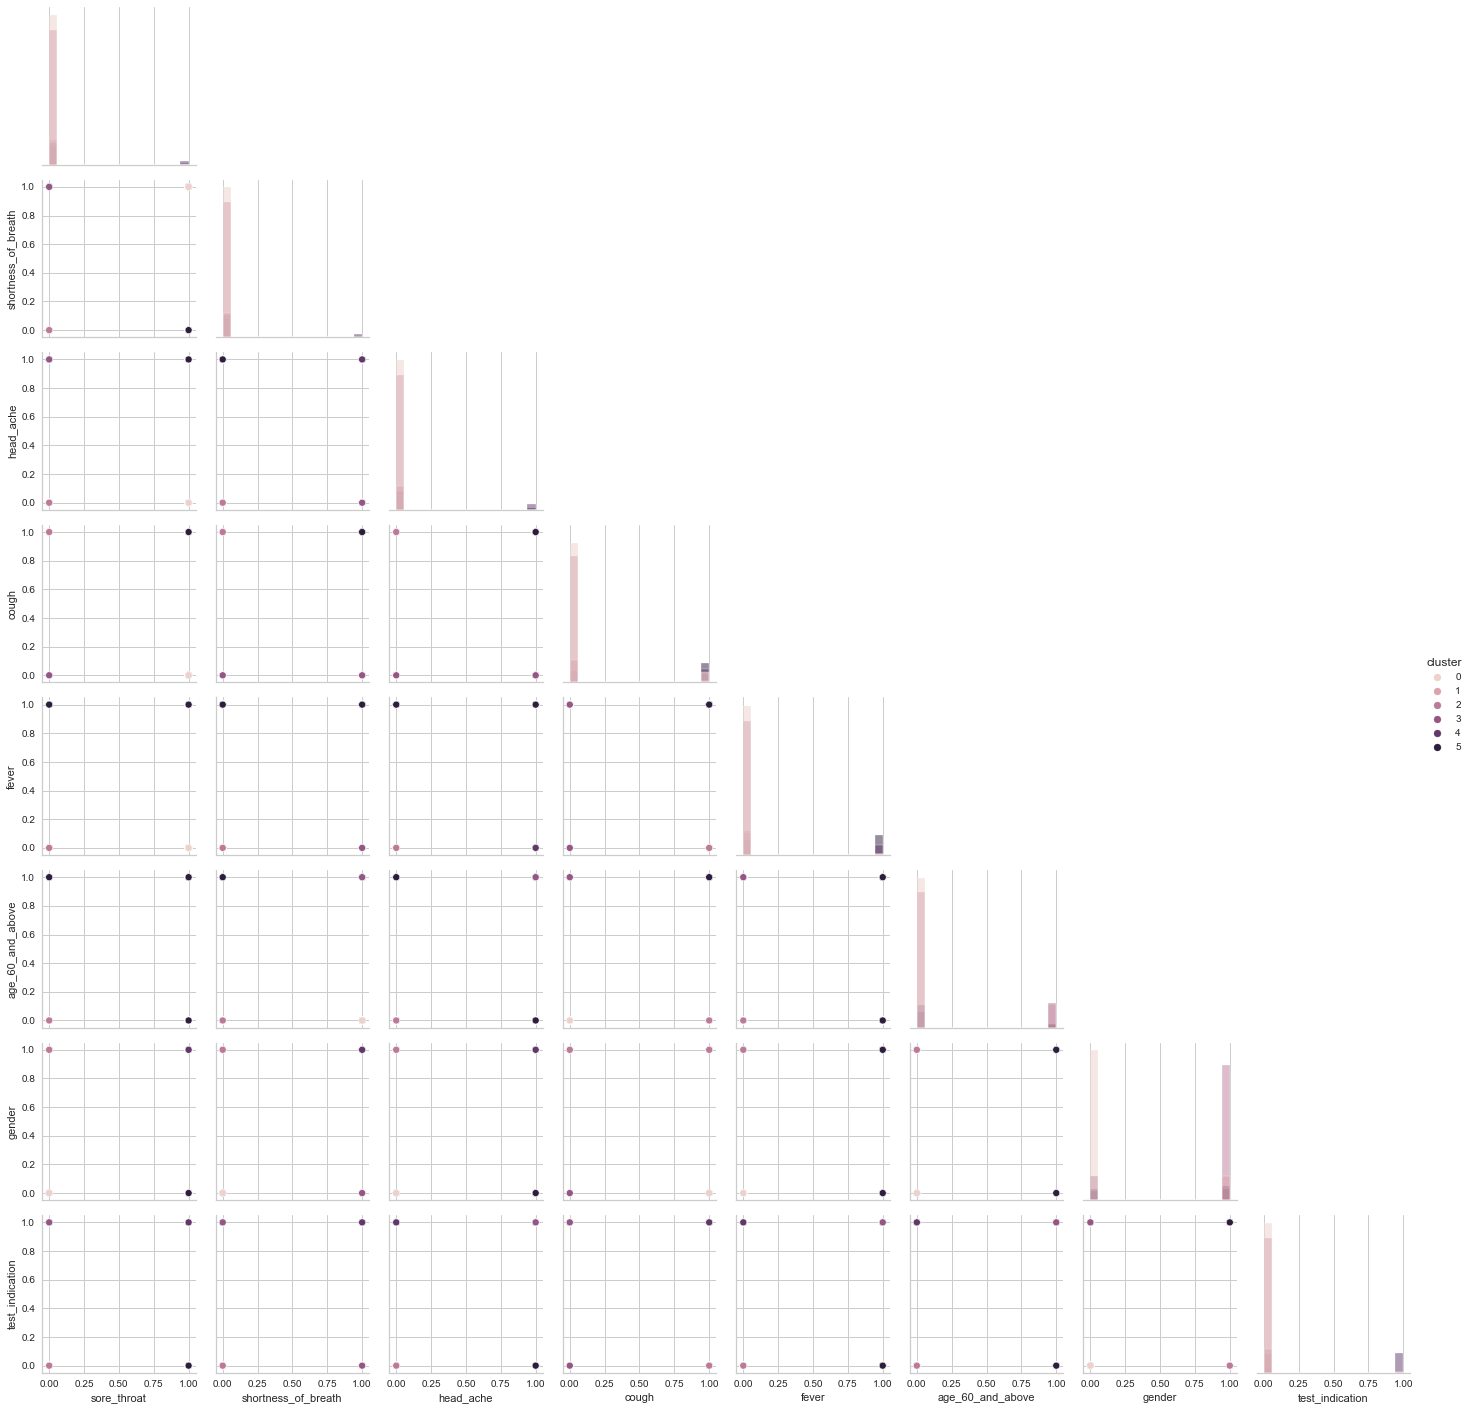

In [31]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(test, hue='cluster',x_vars=x_vars, y_vars=x_vars, corner=True)
# g = sns.PairGrid(test, hue='corona_result')
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

In [34]:
all=test.copy()
all.drop(['cluster'],axis=1,  inplace=True)
all.insert(0, 'counts', len(all.index))
all=all.mean(axis=0)
all

counts                 53020.000000
cough                      0.149830
fever                      0.088853
sore_throat                0.015221
shortness_of_breath        0.012033
head_ache                  0.022199
corona_result              0.090438
age_60_and_above           0.145285
gender                     0.486496
test_indication            0.057375
dtype: float64

In [35]:
def cluster(metadata, data, num):
    cluster=metadata[metadata['cluster']==num]
    cluster.insert(0, 'counts',len(cluster.index))
    cluster=cluster.mean(axis=0)
    data=pd.concat([data, cluster], axis=1, join='inner')
    return data

In [36]:
for i in range(6):
    all= cluster(test, all, i)

In [37]:
all

0             1            0             0  \
counts               53020.000000  21005.000000  3371.000000  18934.000000   
cough                    0.149830      0.072269     0.062296      0.067603   
fever                    0.088853      0.007665     0.031445      0.008873   
sore_throat              0.015221      0.001761     0.005340      0.001215   
shortness_of_breath      0.012033      0.000667     0.006823      0.001268   
head_ache                0.022199      0.001381     0.005340      0.000370   
corona_result            0.090438      0.009998     0.067339      0.013943   
age_60_and_above         0.145285      0.000000     1.000000      0.000000   
gender                   0.486496      0.000000     1.000000      1.000000   
test_indication          0.057375      0.002999     0.007713      0.004278   

                               0            0            0  
counts               3405.000000  3528.000000  2777.000000  
cough                   0.074596     0.540249     0.999640  
fever                   0.020558     0.405045     1.000000  
sore_throat             0.002643     0.156179     0.060857  
shortness_of_breath     0.005580     0.111111     0.059777  
head_ache               0.004993     0.240079     0.093266  
corona_result           0.034361     0.888889     0.302845  
age_60_and_above        1.000000     0.102608     0.203457  
gender                  0.000000     0.553288     0.553475  
test_indication         0.005286     0.773810     0.044653

In [38]:
all.columns=['all', 'cluser 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
all

all      cluser 0    cluster 1     cluster 2  \
counts               53020.000000  21005.000000  3371.000000  18934.000000   
cough                    0.149830      0.072269     0.062296      0.067603   
fever                    0.088853      0.007665     0.031445      0.008873   
sore_throat              0.015221      0.001761     0.005340      0.001215   
shortness_of_breath      0.012033      0.000667     0.006823      0.001268   
head_ache                0.022199      0.001381     0.005340      0.000370   
corona_result            0.090438      0.009998     0.067339      0.013943   
age_60_and_above         0.145285      0.000000     1.000000      0.000000   
gender                   0.486496      0.000000     1.000000      1.000000   
test_indication          0.057375      0.002999     0.007713      0.004278   

                       cluster 3    cluster 4    cluster 5  
counts               3405.000000  3528.000000  2777.000000  
cough                   0.074596     0.540249     0.999640  
fever                   0.020558     0.405045     1.000000  
sore_throat             0.002643     0.156179     0.060857  
shortness_of_breath     0.005580     0.111111     0.059777  
head_ache               0.004993     0.240079     0.093266  
corona_result           0.034361     0.888889     0.302845  
age_60_and_above        1.000000     0.102608     0.203457  
gender                  0.000000     0.553288     0.553475  
test_indication         0.005286     0.773810     0.044653

# as_preprocessing

In [39]:
from sklearn.model_selection import train_test_split

from sklearn import metrics, ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53020 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   cough                53020 non-null  int8 
 1   fever                53020 non-null  int8 
 2   sore_throat          53020 non-null  int64
 3   shortness_of_breath  53020 non-null  int64
 4   head_ache            53020 non-null  int64
 5   corona_result        53020 non-null  int8 
 6   age_60_and_above     53020 non-null  int64
 7   gender               53020 non-null  int8 
 8   test_indication      53020 non-null  int64
 9   cluster              53020 non-null  int32
dtypes: int32(1), int64(5), int8(4)
memory usage: 4.8 MB


## all_features

In [41]:
y=test.corona_result

features_all=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
X_all =test[features_all]

In [42]:
X_resampled_all_re, y_resampled_all_re = SMOTE().fit_resample(X_all, y)
print(sorted(Counter(y_resampled_all_re).items()))

[(0, 48225), (1, 48225)]


## filtered_features

In [43]:
features_filter=['cough', 'fever', 'age_60_and_above', 'gender', 'test_indication', 'cluster']
X_filter =test[features_filter]

In [44]:
X_resampled_filter_re, y_resampled_filter_re = SMOTE().fit_resample(X_filter, y)
print(sorted(Counter(y_resampled_filter_re).items()))

[(0, 48225), (1, 48225)]


## train_test_split

### all_features

In [45]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_resampled_all_re, y_resampled_all_re, test_size=0.2, random_state=random_state)

In [46]:
X_test_all

cough  fever  sore_throat  shortness_of_breath  head_ache  \
34771      0      0            0                    0          0   
68146      0      0            0                    0          0   
26247      0      0            0                    0          0   
18022      0      0            0                    0          0   
36027      0      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
4097       0      0            0                    0          0   
63301      0      1            1                    0          1   
26577      0      0            0                    0          0   
35688      0      0            0                    0          0   
39818      0      0            0                    0          0   

       age_60_and_above  gender  test_indication  cluster  
34771                 0       0                0        0  
68146                 0       0                0        0  
26247                 0       1                0        2  
18022                 0       1                0        2  
36027                 0       1                0        2  
...                 ...     ...              ...      ...  
4097                  0       1                0        2  
63301                 0       1                0        4  
26577                 0       0                0        0  
35688                 0       1                0        2  
39818                 0       0                0        0  

[19290 rows x 9 columns]

### filtered_features

In [47]:
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(X_resampled_filter_re, y_resampled_filter_re, test_size=0.2, random_state=random_state)

## XGBoost

### XGBoost(all)

In [48]:
xgb_all = XGBClassifier(learning_rate=0.1,
                      n_estimators=20,           # 树的个数-10棵树建立xgboost
                      max_depth=10,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=42,           # 随机数
                      slient = 0
                      )
# xgb_all=XGBClassifier()
xgb_all.fit(X_train_all,y_train_all)

c:\Users\betty\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              slient=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
model_type="XGBoost (all) SMOTE"
predicted_all = xgb_all.predict(X_test_all)
predicted_prob_all = xgb_all.predict_proba(X_test_all)

# accuracy=accuracy_score(y_test, predicted)
# confusion=confusion_matrix(y_test, predicted)

# print("Accurracy: ", accuracy)
# print("Confusion Matrix: ", confusion)

#### False Negative

In [50]:
result=X_test_all.copy()
result["corona_result"]=y_test_all
X_test_all

cough  fever  sore_throat  shortness_of_breath  head_ache  \
34771      0      0            0                    0          0   
68146      0      0            0                    0          0   
26247      0      0            0                    0          0   
18022      0      0            0                    0          0   
36027      0      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
4097       0      0            0                    0          0   
63301      0      1            1                    0          1   
26577      0      0            0                    0          0   
35688      0      0            0                    0          0   
39818      0      0            0                    0          0   

       age_60_and_above  gender  test_indication  cluster  
34771                 0       0                0        0  
68146                 0       0                0        0  
26247                 0       1                0        2  
18022                 0       1                0        2  
36027                 0       1                0        2  
...                 ...     ...              ...      ...  
4097                  0       1                0        2  
63301                 0       1                0        4  
26577                 0       0                0        0  
35688                 0       1                0        2  
39818                 0       0                0        0  

[19290 rows x 9 columns]

In [51]:
result["xgb_all"]=predicted_all
result

cough  fever  sore_throat  shortness_of_breath  head_ache  \
34771      0      0            0                    0          0   
68146      0      0            0                    0          0   
26247      0      0            0                    0          0   
18022      0      0            0                    0          0   
36027      0      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
4097       0      0            0                    0          0   
63301      0      1            1                    0          1   
26577      0      0            0                    0          0   
35688      0      0            0                    0          0   
39818      0      0            0                    0          0   

       age_60_and_above  gender  test_indication  cluster  corona_result  \
34771                 0       0                0        0              0   
68146                 0       0                0        0              1   
26247                 0       1                0        2              0   
18022                 0       1                0        2              0   
36027                 0       1                0        2              0   
...                 ...     ...              ...      ...            ...   
4097                  0       1                0        2              0   
63301                 0       1                0        4              1   
26577                 0       0                0        0              0   
35688                 0       1                0        2              0   
39818                 0       0                0        0              1   

       xgb_all  
34771        0  
68146        0  
26247        0  
18022        0  
36027        0  
...        ...  
4097         0  
63301        1  
26577        0  
35688        0  
39818        0  

[19290 rows x 11 columns]

In [52]:
xgb_all_fn=result[(result['corona_result']==1) & (result['xgb_all']==0)]
xgb_all_fn.apply(pd.Series.value_counts)

cough   fever  sore_throat  shortness_of_breath  head_ache  \
0  1025.0  1025.0       1025.0               1025.0     1025.0   
1     NaN     NaN          NaN                  NaN        NaN   
2     NaN     NaN          NaN                  NaN        NaN   
3     NaN     NaN          NaN                  NaN        NaN   

   age_60_and_above  gender  test_indication  cluster  corona_result  xgb_all  
0             789.0   413.0           1025.0      343            NaN   1025.0  
1             236.0   612.0              NaN      166         1025.0      NaN  
2               NaN     NaN              NaN      446            NaN      NaN  
3               NaN     NaN              NaN       70            NaN      NaN

#### False Positive

In [53]:
xgb_all_fp=result[(result['corona_result']==0) & (result['xgb_all']==1)]
xgb_all_fp.apply(pd.Series.value_counts)

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0   19.0  154.0        520.0                516.0      518.0   
1  508.0  373.0          7.0                 11.0        9.0   
2    NaN    NaN          NaN                  NaN        NaN   
3    NaN    NaN          NaN                  NaN        NaN   
4    NaN    NaN          NaN                  NaN        NaN   
5    NaN    NaN          NaN                  NaN        NaN   

   age_60_and_above  gender  test_indication  cluster  corona_result  xgb_all  
0             378.0   267.0            449.0        3          527.0      NaN  
1             149.0   260.0             78.0       45            NaN    527.0  
2               NaN     NaN              NaN        3            NaN      NaN  
3               NaN     NaN              NaN       43            NaN      NaN  
4               NaN     NaN              NaN       72            NaN      NaN  
5               NaN     NaN              NaN      361            NaN      NaN

Accuracy: 0.92
Auc: 0.95
Detail:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      9621
           1       0.94      0.89      0.92      9669

    accuracy                           0.92     19290
   macro avg       0.92      0.92      0.92     19290
weighted avg       0.92      0.92      0.92     19290



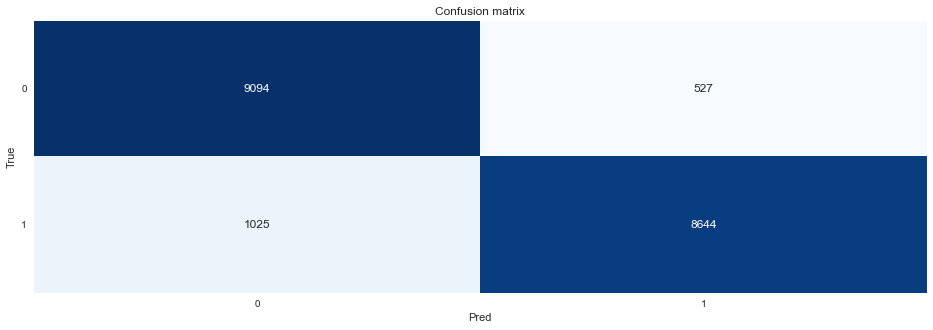

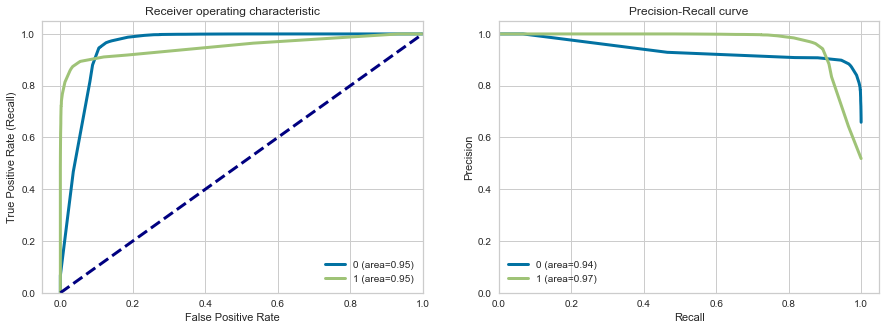

In [54]:
classes = np.unique(y_test_all)
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# Hierarchical Clustering

In [55]:
data_hc=test.copy()
data_hc.drop(['cluster'], axis=1, inplace=True)
data_hc

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0          0      0            0                    0          0   
1          0      0            0                    0          0   
2          0      0            0                    0          0   
3          0      0            0                    0          0   
4          1      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
53838      1      1            0                    0          0   
53839      1      1            1                    0          1   
53840      1      0            0                    0          0   
53841      1      0            0                    0          0   
53842      1      0            0                    0          0   

       corona_result  age_60_and_above  gender  test_indication  
0                  0                 0       1                0  
1                  0                 0       0                0  
2                  0                 0       1                0  
3                  1                 0       0                0  
4                  0                 0       1                0  
...              ...               ...     ...              ...  
53838              0                 1       0                0  
53839              0                 0       0                0  
53840              0                 0       0                0  
53841              0                 0       1                0  
53842              0                 0       1                0  

[53020 rows x 9 columns]

In [56]:
hc=sch.linkage(data_hc, metric='euclidean', method='ward')

In [57]:
plt.figure(figsize = (15, 10))
sch.dendrogram(hc)
plt.title('Hierarchical Clustering')
plt.xlabel('indices')
plt.ylabel('distance')
plt.show()

: 

: 

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Hiyearşik Kümeleme - Dendrogram")
plt.xlabel('indices')
plt.ylabel('distance')
sch.dendrogram(hc,
          truncate_mode="lastp",
          p = 4,
          show_contracted=True)

In [ ]:
hierarchical  = AgglomerativeClustering(n_clusters = 4,
                                  affinity= "euclidean",
                                  linkage = "ward").fit_predict(metadata)

In [ ]:
dfff = metadata.copy()
dfff["Clusters for Hierarchical"] = hierarchical
dfff[0:5]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  Clusters for Hierarchical  
0   3.92     1065        1                          3  
1   3.40     1050        1                          3  
2   3.17     1185        1                          3  
3   3.45     1480        1                          1  
4   2.93      735        0                          2

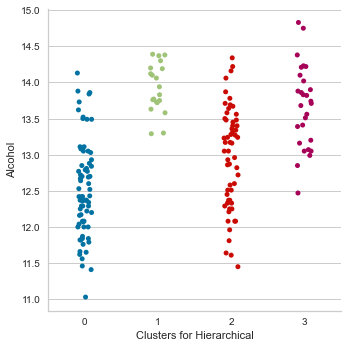

In [ ]:
sns.catplot(x = "Clusters for Hierarchical", y = "Alcohol", data = dfff)

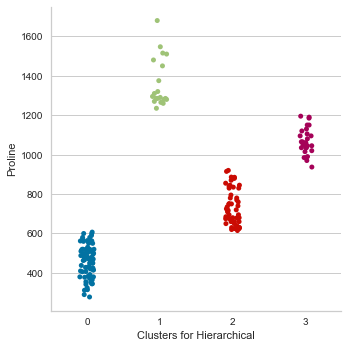

In [ ]:
sns.catplot(x = "Clusters for Hierarchical", y = "Proline", data = dfff)

# KMedoids

In [14]:
test

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0          0      0            0                    0          0   
1          0      0            0                    0          0   
2          0      0            0                    0          0   
3          0      0            0                    0          0   
4          1      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
53838      1      1            0                    0          0   
53839      1      1            1                    0          1   
53840      1      0            0                    0          0   
53841      1      0            0                    0          0   
53842      1      0            0                    0          0   

       corona_result  age_60_and_above  gender  test_indication  
0                  0                 0       1                0  
1                  0                 0       0                0  
2                  0                 0       1                0  
3                  1                 0       0                0  
4                  0                 0       1                0  
...              ...               ...     ...              ...  
53838              0                 1       0                0  
53839              0                 0       0                0  
53840              0                 0       0                0  
53841              0                 0       1                0  
53842              0                 0       1                0  

[53020 rows x 9 columns]

In [13]:
sse = {} 

# for k in range(1, 10):
#     kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(metadata)
#     sse[k] = kmedo.inertia_

for k in range(1, 11):
    kmedo = KMedoids(n_clusters=k, max_iter=10, init='k-medoids++',random_state=random_state).fit(test)
    sse[k] = kmedo.inertia_

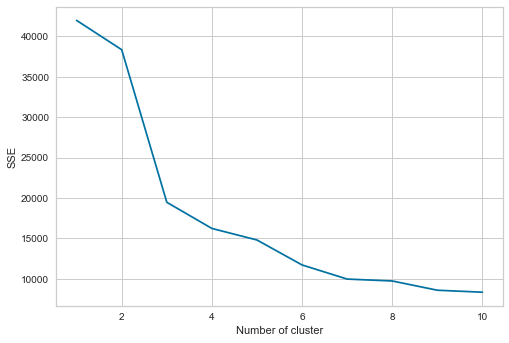

In [14]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [15]:
#Train the Model
kmedoids = KMedoids(n_clusters=3, max_iter=10, init='k-medoids++',random_state=random_state).fit(test)
kmed=test.copy()
kmed['cluster'] = kmedoids.labels_

In [16]:
kmedoids.inertia_

19465.157226606338

In [17]:
kmedoids.cluster_centers_

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

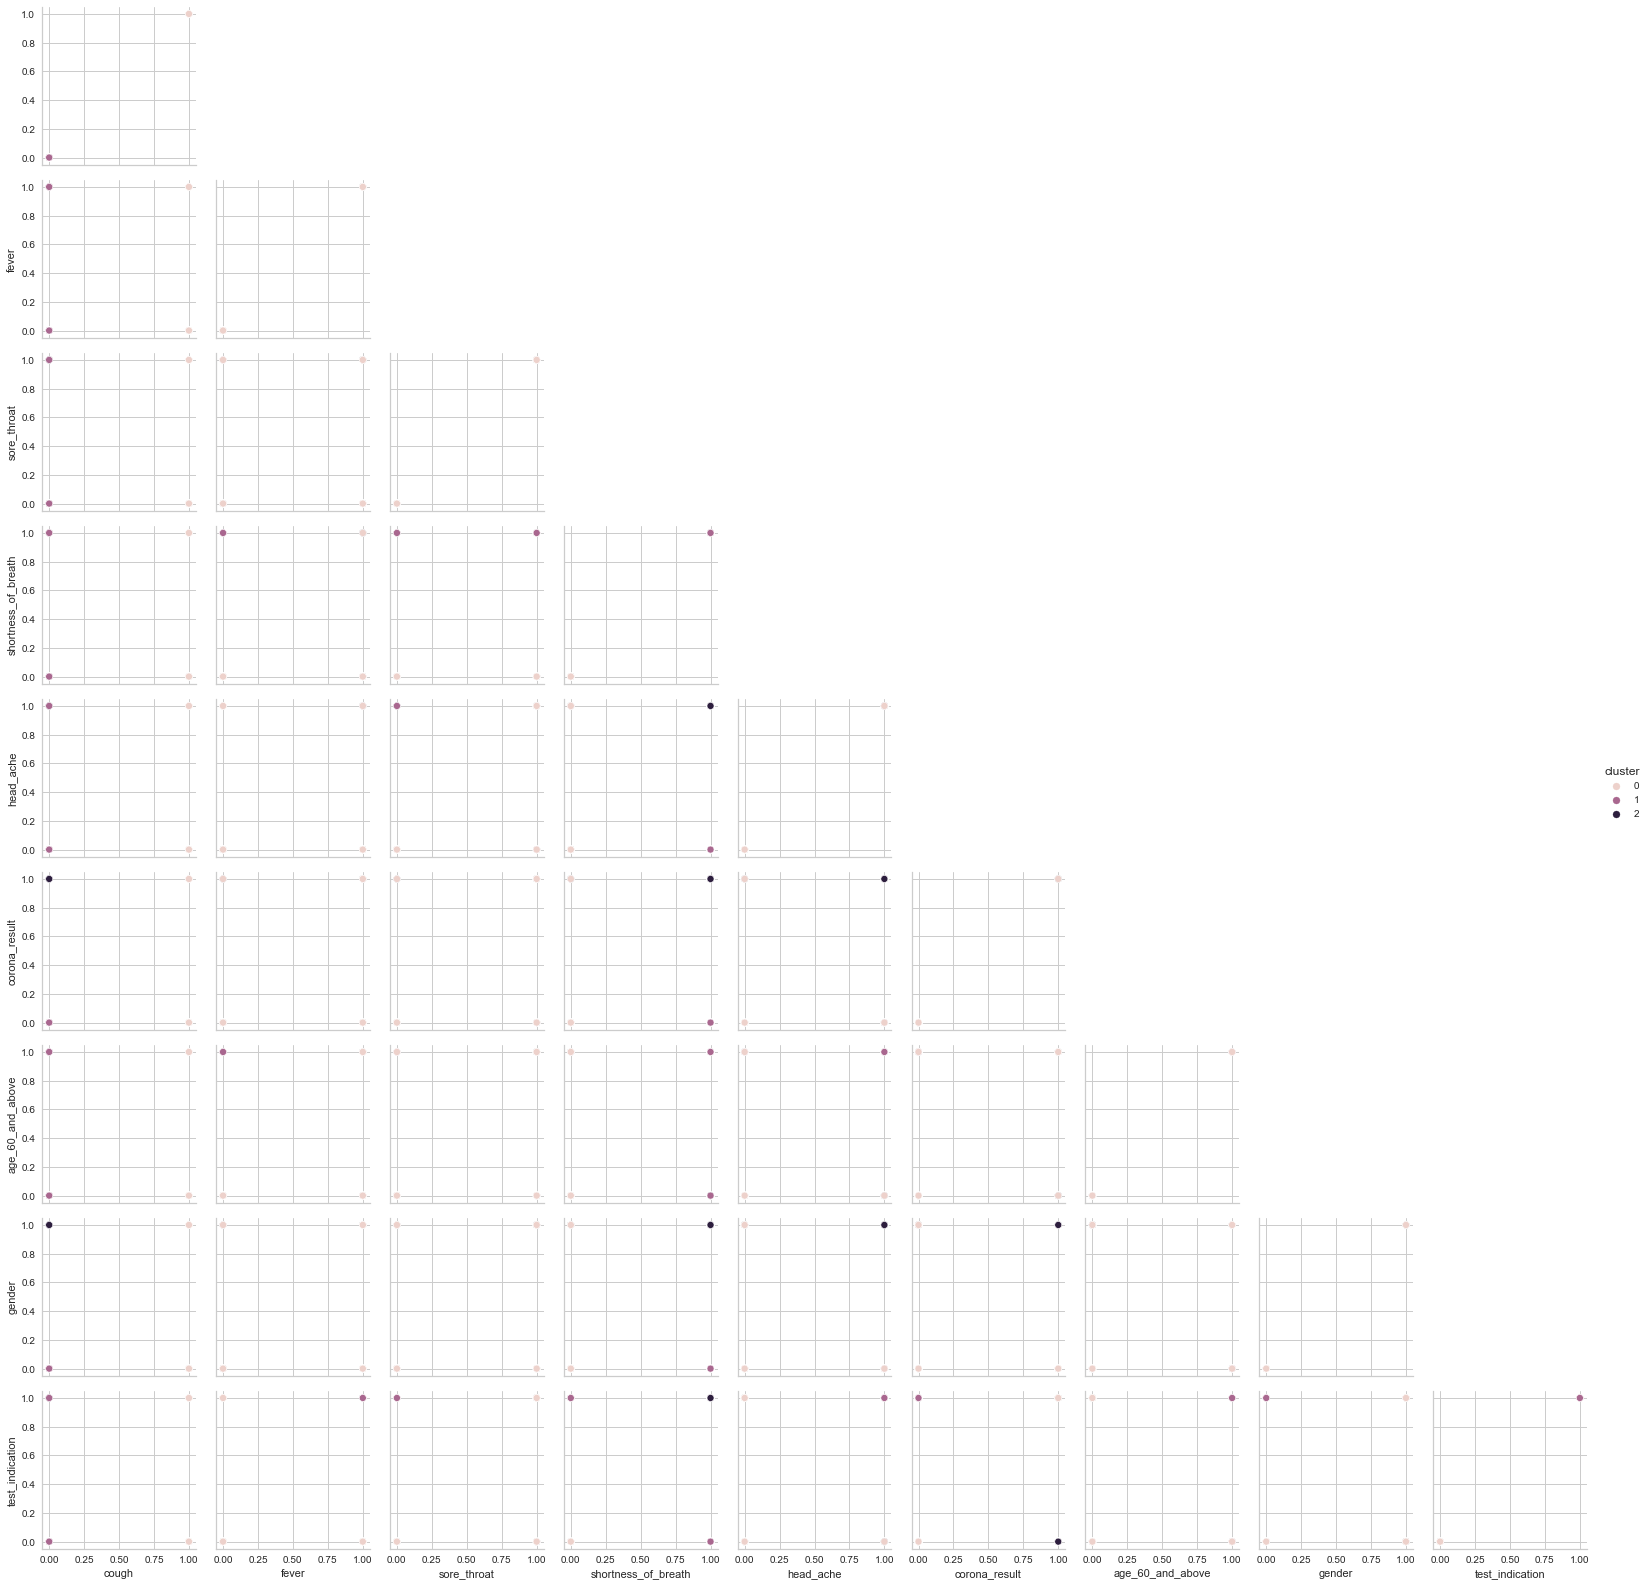

In [18]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(kmed, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

# DBSCAN

In [19]:
neighbors = 6
# X_embedded is your data
ns = neighbors
nbrs = NearestNeighbors(n_neighbors = neighbors).fit(test)
distances, indices = nbrs.kneighbors(test)
distance_desc = sorted(distances[:, ns-1], reverse=True)
px.line(x = list(range(1, len(distance_desc) + 1)), y = distance_desc)

In [20]:
# pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from kneed import KneeLocator

In [21]:

kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

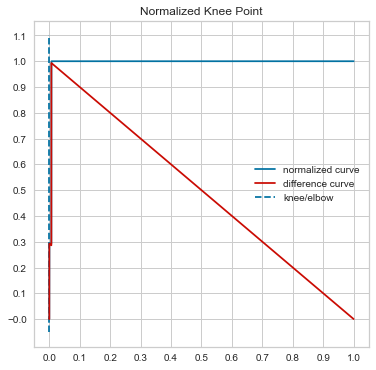

In [22]:
kneedle.plot_knee_normalized()

In [23]:
kneedle.knee_y

1.4142135623730951

In [30]:
dbscan = DBSCAN(eps = 1, min_samples = 18).fit(test)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
data_dbscan=test.copy()
data_dbscan['cluster']=dbscan.labels_
data_dbscan

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0          0      0            0                    0          0   
1          0      0            0                    0          0   
2          0      0            0                    0          0   
3          0      0            0                    0          0   
4          1      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
53838      1      1            0                    0          0   
53839      1      1            1                    0          1   
53840      1      0            0                    0          0   
53841      1      0            0                    0          0   
53842      1      0            0                    0          0   

       corona_result  age_60_and_above  gender  test_indication  cluster  
0                  0                 0       1                0        0  
1                  0                 0       0                0        0  
2                  0                 0       1                0        0  
3                  1                 0       0                0        0  
4                  0                 0       1                0        0  
...              ...               ...     ...              ...      ...  
53838              0                 1       0                0        0  
53839              0                 0       0                0        0  
53840              0                 0       0                0        0  
53841              0                 0       1                0        0  
53842              0                 0       1                0        0  

[53020 rows x 10 columns]

In [32]:
data_dbscan.sort_values(by='cluster')

cough  fever  sore_throat  shortness_of_breath  head_ache  \
0          0      0            0                    0          0   
35915      0      0            0                    0          0   
35916      0      0            0                    0          0   
35917      0      0            0                    0          0   
35918      0      0            0                    0          0   
...      ...    ...          ...                  ...        ...   
17843      0      0            0                    0          0   
17844      0      0            0                    0          0   
17845      0      0            0                    0          0   
17835      0      0            0                    0          0   
53842      1      0            0                    0          0   

       corona_result  age_60_and_above  gender  test_indication  cluster  
0                  0                 0       1                0        0  
35915              0                 0       0                0        0  
35916              0                 0       0                0        0  
35917              0                 0       0                0        0  
35918              0                 0       0                0        0  
...              ...               ...     ...              ...      ...  
17843              0                 0       0                0        0  
17844              0                 0       1                0        0  
17845              0                 0       0                0        0  
17835              0                 0       1                0        0  
53842              0                 0       1                0        0  

[53020 rows x 10 columns]

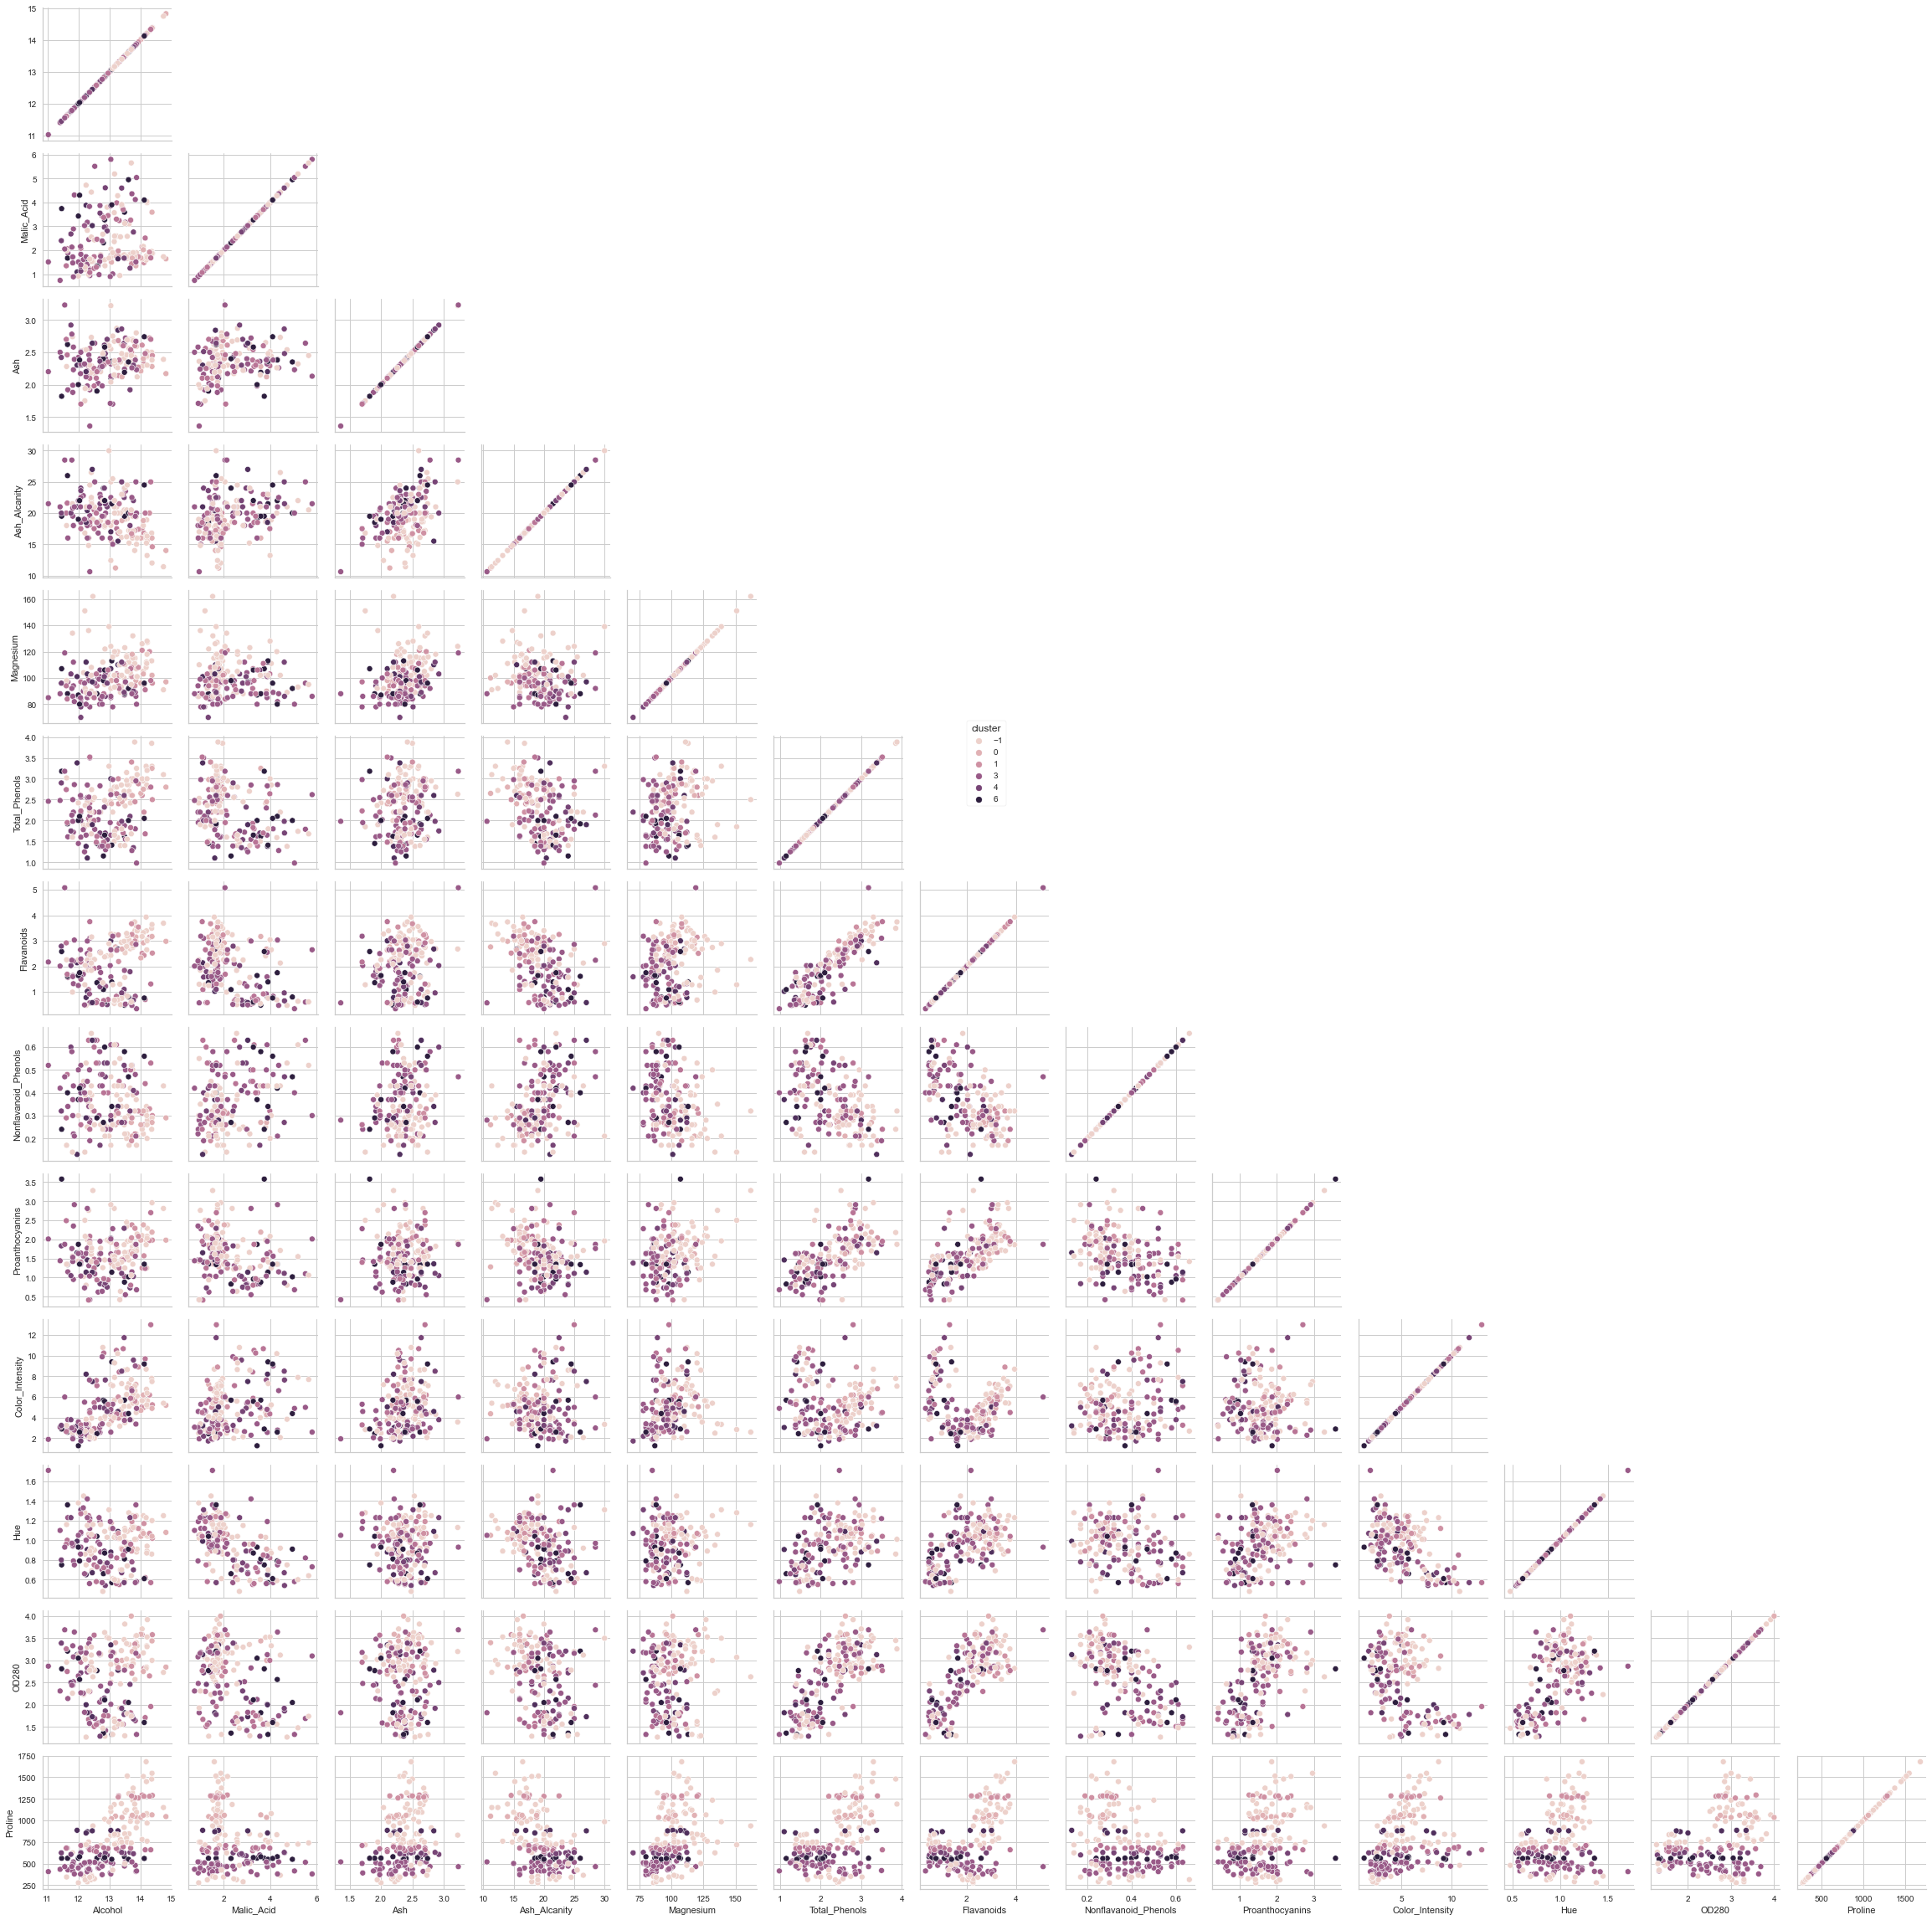

In [ ]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(data_dbscan, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

In [ ]:
data_dbscan_non=data_dbscan.copy()
data_dbscan_non.drop(data_dbscan_non.loc[data_dbscan_non['cluster']==-1].index, inplace=True)
data_dbscan_non.sort_values(by='cluster')

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
1      13.20        1.78  2.14          11.2        100           2.65   
48     14.10        2.02  2.40          18.8        103           2.75   
46     14.38        3.59  2.28          16.0        102           3.25   
54     13.74        1.67  2.25          16.4        118           2.60   
41     13.41        3.84  2.12          18.8         90           2.45   
..       ...         ...   ...           ...        ...            ...   
138    13.49        3.59  2.19          19.5         88           1.62   
87     11.65        1.67  2.62          26.0         88           1.92   
132    12.81        2.31  2.40          24.0         98           1.15   
101    12.60        1.34  1.90          18.5         88           1.45   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
1          2.76                  0.26             1.28             4.38  1.05   
48         2.92                  0.32             2.38             6.20  1.07   
46         3.17                  0.27             2.19             4.90  1.04   
54         2.90                  0.21             1.62             5.85  0.92   
41         2.68                  0.27             1.48             4.28  0.91   
..          ...                   ...              ...              ...   ...   
138        0.48                  0.58             0.88             5.70  0.81   
87         1.61                  0.40             1.34             2.60  1.36   
132        1.09                  0.27             0.83             5.70  0.66   
101        1.36                  0.29             1.35             2.45  1.04   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
1     3.40     1050        0  
48    2.75     1060        0  
46    3.44     1065        0  
54    3.20     1060        0  
41    3.00     1035        0  
..     ...      ...      ...  
138   1.82      580        6  
87    3.21      562        6  
132   1.36      560        6  
101   2.77      562        6  
177   1.60      560        6  

[111 rows x 14 columns]

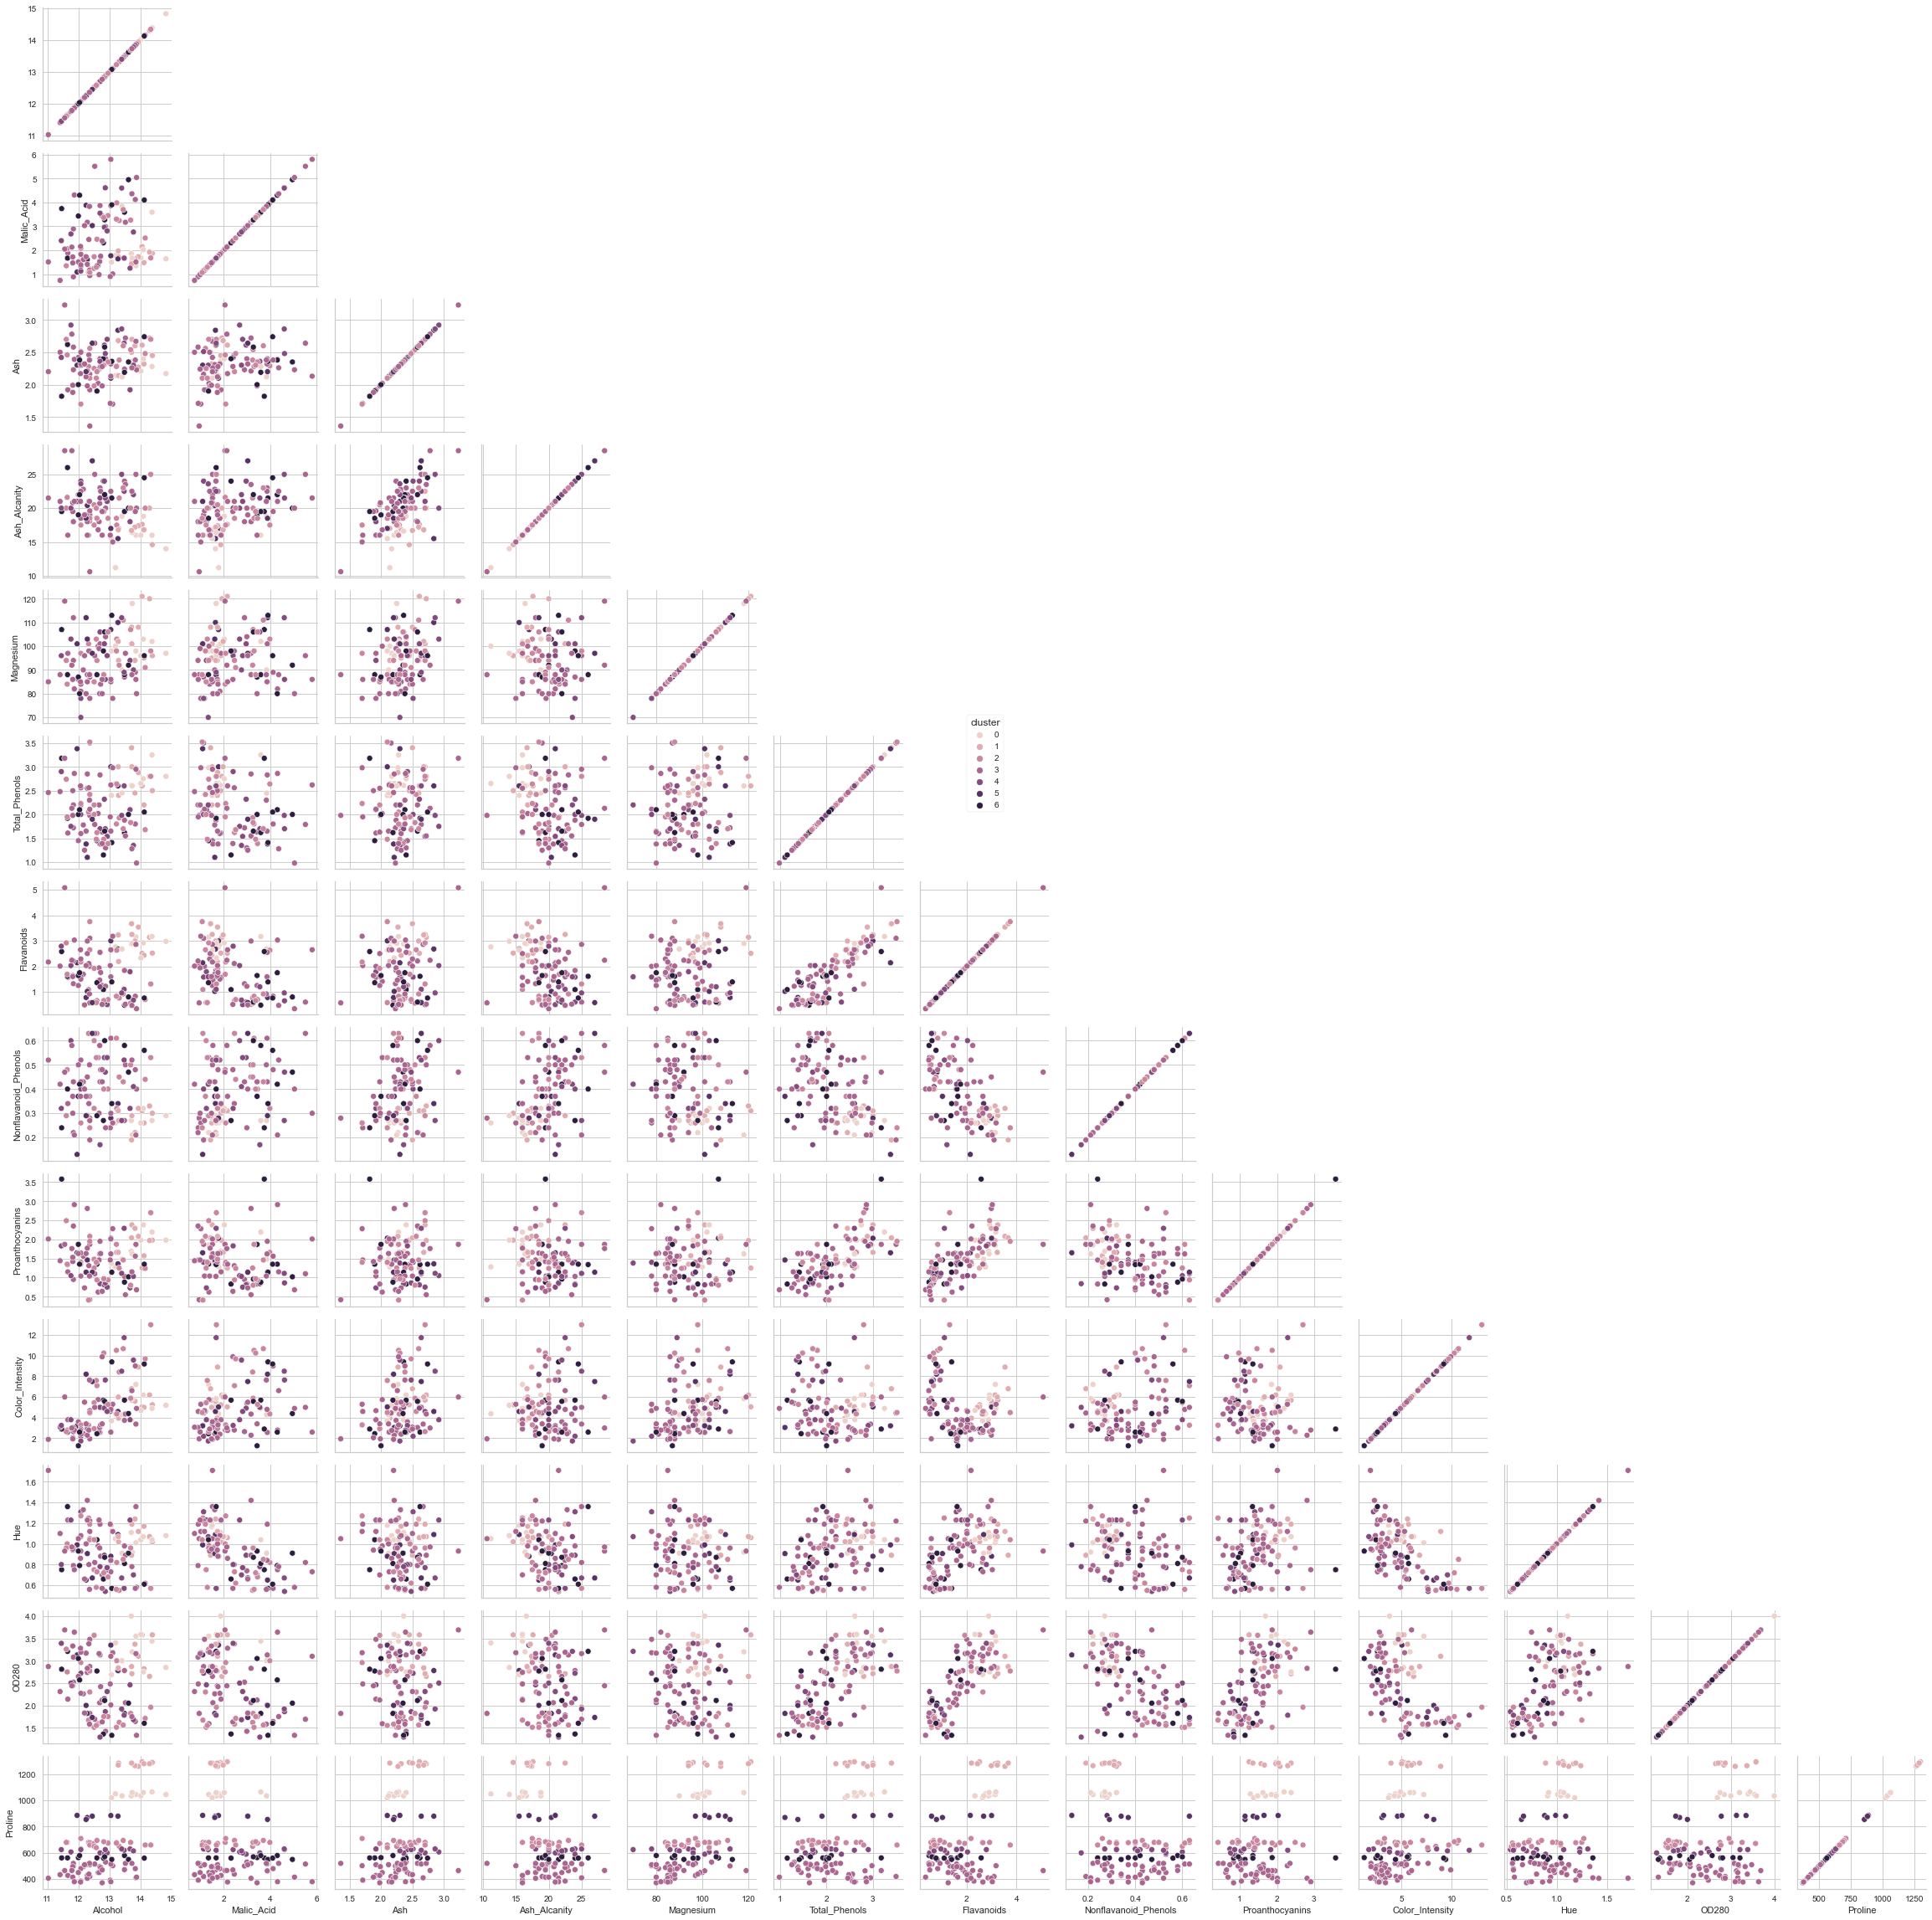

In [ ]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(data_dbscan_non, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')